---
# <font color="#CA3532">Deep Learning Fundamentals and Basic Tools - Lab Assignment 2</font>
---

Last updated on 2020-09-22


---

*SESSION 1 (Wednesday, 2020-09-23):*

- This assingment is centered in the use of [Keras](https://keras.io/)

- Keras is an open-source neural-network library. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

- Keras itself can work using different motors. We will use it with TensorFlow under the hood.

- We will see how easily is to create neural networks with keras and the wide variety of configurations for our network we can use.

** Instructions and work environment sections from the 1st assingment still valid **


In [1]:
# TO-DO: Include your names and NIAs here:
student_data = [{'name': 'Manuel Otero', 'nia': '420830'},
                {'name': 'Javier Muñoz', 'nia': '358874'}]

### <font color="#CA3532">Import the libraries</font>

TensorFlow officially included Keras, so if you have TensorFlow, you have keras!

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler

# !git clone https://github.com/luisferuam/DLFBT-LAB
import sys
sys.path.append('DLFBT-LAB')
import dlfbt

2023-10-09 13:31:54.823143: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 13:31:55.295951: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### <font color="#CA3532">Data set</font>


In [3]:
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'
# Details https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.names

dataset = np.loadtxt(dataset_url, delimiter=',')

# Split database in atributtes and classes
print(dataset)

#-------------------------------------------------------------------------------
# TO-DO block: Divide attributes and classes/labels. Store the numer of atrributes
#-------------------------------------------------------------------------------
y=dataset[:,-1]
x=dataset[:,0:-1]
x_size=np.size(x, axis=1)
#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

[[ 1.24   0.875 -0.205 -0.078  0.067  0.   ]
 [ 0.268  1.352  1.035 -0.332  0.217  0.   ]
 [ 1.567  0.867  1.3    1.041  0.559  0.   ]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671  1.   ]
 [ 0.15   0.933  2.363 -0.742 -0.617  0.   ]
 [ 0.137  0.714  1.35   0.972 -0.63   1.   ]]


In [4]:
# Final result with the classes stored in y
print(x_size)
print(x)
print(y)

5
[[ 1.24   0.875 -0.205 -0.078  0.067]
 [ 0.268  1.352  1.035 -0.332  0.217]
 [ 1.567  0.867  1.3    1.041  0.559]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671]
 [ 0.15   0.933  2.363 -0.742 -0.617]
 [ 0.137  0.714  1.35   0.972 -0.63 ]]
[0. 0. 0. ... 1. 0. 1.]


In [5]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x

array([[ 0.49035227, -0.45101251, -1.04796119, -0.59857896, -0.02018657],
       [-0.64165252,  0.10951862,  0.29207121, -0.91749121,  0.24042422],
       [ 0.87118105, -0.46041345,  0.57844911,  0.80639274,  0.83461682],
       ...,
       [ 0.24694795, -0.79297175,  1.19010906,  1.42287272, -1.30239164],
       [-0.77907698, -0.38285569,  1.72720269, -1.43227084, -1.20857176],
       [-0.79421696, -0.64020646,  0.63248267,  0.71975909, -1.23115802]])

### <font color="#CA3532">Defining our model</font>

- From the input to the output in keras we can define the properties of each laye (size, activation function, connectivity topology...) with the sequential mode.

- In this case we are going to create our basic multilayer feedforward network



In [6]:
# Define the model using keras
nn = Sequential()

#-------------------------------------------------------------------------------
# TO-DO block: Add fully connected layers to create a MLP like in assignment 1
#-------------------------------------------------------------------------------
nn.add(Dense(10, 'sigmoid', input_shape=(5,)))

nn.add(Dense(1, 'linear', use_bias=True))


#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

2023-10-09 13:31:56.098197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-09 13:31:56.102834: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-09 13:31:56.103218: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### <font color="#CA3532">Compile the network</font>

- Compile is the step where our network is created

- Here we have to define different aspects involved in the trainning of the network

- In each section you have an URL to the official documentation. Take a look at the availability of different strategies in each case.

- It is possible to also define your own functions for this.

### <font color="#CA3532"> Optimizer </font>

Strategy to calculate the weights corrections

https://keras.io/api/optimizers/


### <font color="#CA3532"> Loss function </font>

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

https://keras.io/api/losses/

### <font color="#CA3532"> Metrics (results) </font>

A metric is a function that is used to judge the performance of your model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

https://keras.io/api/metrics/

In [7]:
# Compile

#-------------------------------------------------------------------------------
# TO-DO block: Compile your network, to reproduce the assignment 1 MLP
#-------------------------------------------------------------------------------
#loss_f=k.losses.CategoricalCrossentropy(
#    from_logits=True
#)
learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.SGD(learning_rate=learning_RATE), loss='mse', metrics=['accuracy'])
#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

### <font color="#CA3532">Train the network</font>

The Fit method trains the network according to the data.

Here we introduce all the data together and select a 20% of the data for validation purposes.

Other ways to do this are allowed, including the optimization of the parameters.

https://keras.io/api/models/model_training_apis/#fit-method

In [8]:
# Fit
history = nn.fit(x, y, epochs=500, verbose=1, validation_split=0.2)

# Fit
#history = nn.fit(x, y, epochs=50, verbose=0, validation_split=0.2)

Epoch 1/500


2023-10-09 13:31:57.297999: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-09 13:31:57.299591: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f68319d4150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-09 13:31:57.299605: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-10-09 13:31:57.391814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-09 13:31:57.428384: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


136/136 [==============================] - 1s 2ms/step - loss: 0.2492 - accuracy: 0.6780 - val_loss: 0.2052 - val_accuracy: 0.6762
Epoch 2/500
136/136 [==============================] - 0s 1ms/step - loss: 0.1961 - accuracy: 0.6762 - val_loss: 0.1861 - val_accuracy: 0.6901
Epoch 3/500
136/136 [==============================] - 0s 1ms/step - loss: 0.1816 - accuracy: 0.6875 - val_loss: 0.1764 - val_accuracy: 0.6910
Epoch 4/500
136/136 [==============================] - 0s 1ms/step - loss: 0.1732 - accuracy: 0.7007 - val_loss: 0.1681 - val_accuracy: 0.7216
Epoch 5/500
136/136 [==============================] - 0s 1ms/step - loss: 0.1679 - accuracy: 0.7143 - val_loss: 0.1635 - val_accuracy: 0.7364
Epoch 6/500
136/136 [==============================] - 0s 1ms/step - loss: 0.1643 - accuracy: 0.7296 - val_loss: 0.1608 - val_accuracy: 0.7484
Epoch 7/500
136/136 [==============================] - 0s 1ms/step - loss: 0.1621 - accuracy: 0.7377 - val_loss: 0.1582 - val_accuracy: 0.7521
Epoch 8/500

In [9]:
# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just considering 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

# Also, the predict method is available to classify unlabeled data

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 71 (284.00 Byte)
Trainable params: 71 (284.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



169/169 [==============================] - 0s 743us/step - loss: 0.1361 - accuracy: 0.7957
Accuracy: 79.57


### <font color="#CA3532">Plot data</font>

- History object saves the different epoch data

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


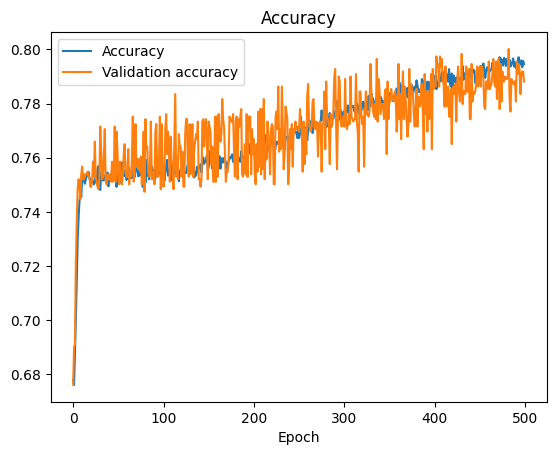

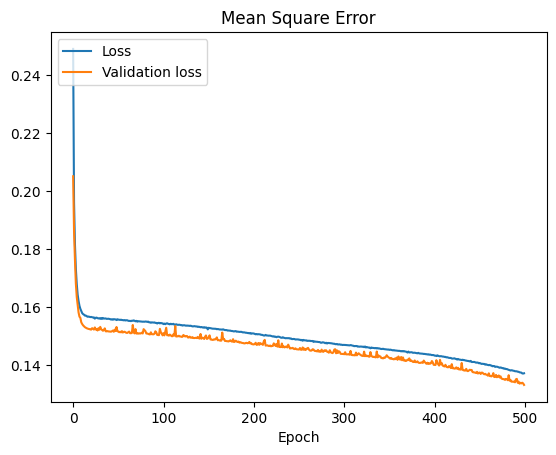

In [10]:
# Plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

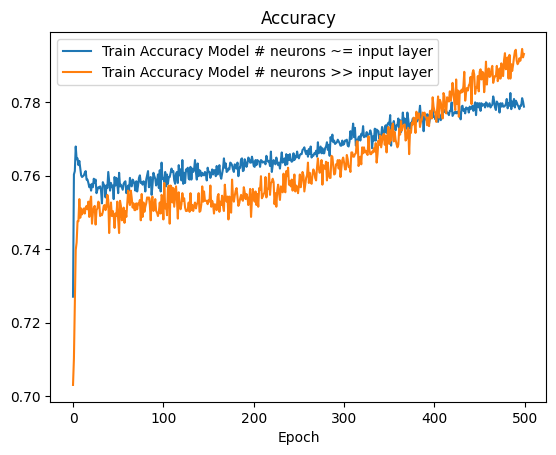

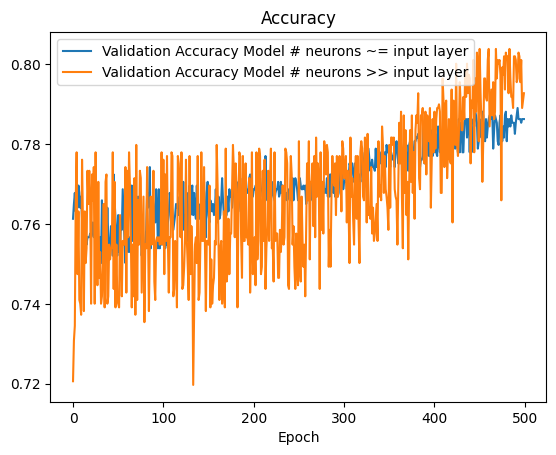

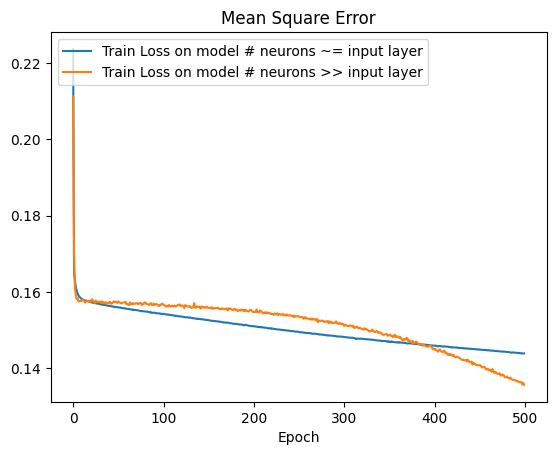

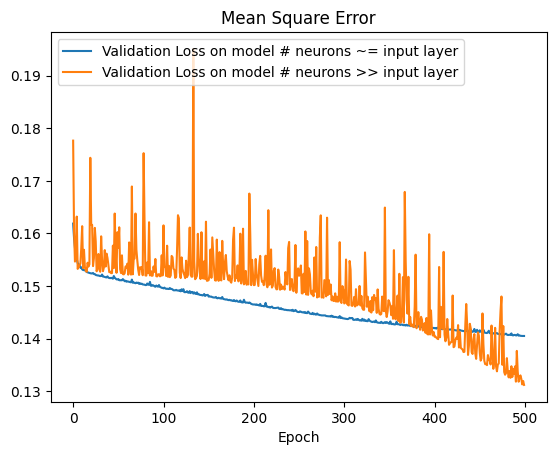

In [11]:
#-------------------------------------------------------------------------------
# TO-DO block: Explain what you observe
#-------------------------------------------------------------------------------
# Using a small number of neurons in the hidden layer (~= input layer)

nn_little = Sequential()

nn_little.add(Dense(7, 'sigmoid', input_shape=(5,)))
nn_little.add(Dense(1, 'linear', use_bias=True))

learning_RATE=0.005
nn_little.compile(optimizer = keras.optimizers.SGD(learning_rate=learning_RATE), loss='mse', metrics=['accuracy'])
history_little = nn_little.fit(x, y, verbose=0, epochs=500, validation_split=0.2)

# Using a big number of neurons in the hidden layer (>> input layer)

nn_big = Sequential()

nn_big.add(Dense(40, 'sigmoid', input_shape=(5,)))
nn_big.add(Dense(1, 'linear', use_bias=True))

learning_RATE=0.01
nn_big.compile(optimizer = keras.optimizers.SGD(learning_rate=learning_RATE), loss='mse', metrics=['accuracy'])
history_big = nn_big.fit(x, y, verbose=0, epochs=500, validation_split=0.2)

# Now we plot the data of the histories for both models

plt.plot(history_little.history['accuracy'], label='Train Accuracy Model # neurons ~= input layer')
plt.plot(history_big.history['accuracy'], label='Train Accuracy Model # neurons >> input layer')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history_little.history['val_accuracy'], label='Validation Accuracy Model # neurons ~= input layer')
plt.plot(history_big.history['val_accuracy'], label='Validation Accuracy Model # neurons >> input layer')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history_little.history['loss'], label='Train Loss on model # neurons ~= input layer')
plt.plot(history_big.history['loss'], label='Train Loss on model # neurons >> input layer')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history_little.history['val_loss'], label='Validation Loss on model # neurons ~= input layer')
plt.plot(history_big.history['val_loss'], label='Validation Loss on model # neurons >> input layer')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

After training two models following the constrains:

* Using a small number of neurons in the hidden layer (~= input layer)
* Using a big number of neurons in the hidden layer (>> input layer)

We have observed that for every metric, being train_accuracy, val_accuracy, train_loss and val_loss, the model where the number of units in the hidden layer are larger to the input performs better.

This may be because when we use a lot of neurons in the hidden layer, the net transforms the data from something "simple", to a high complexity space (40 dimensions space), where the variability of the data is better represented. 

### <font color="#CA3532">Optimize the network design</font>

- Change the network arquitecture, introducing more layers and neurons to obtain a better result. You can:
 - Add more and different type of layers
 - Change the activation funcions
 - Change the loss / optimizer




2023-10-09 13:35:45.052572: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


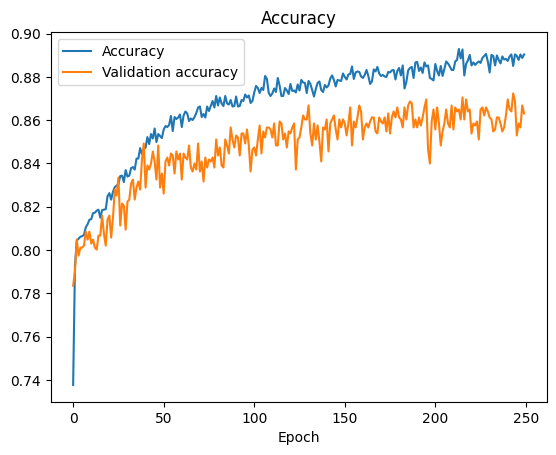

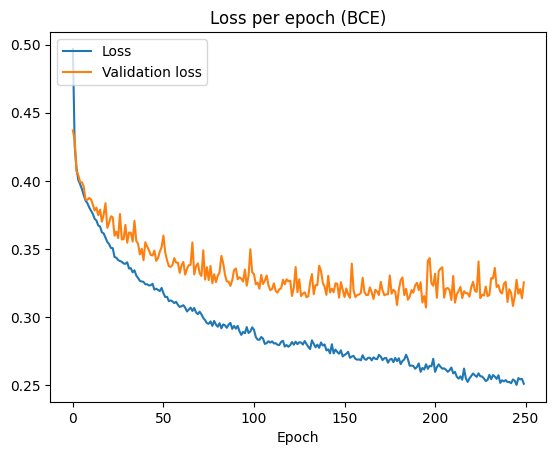

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 48        
                                                                 
 dense_7 (Dense)             (None, 10)                90        
                                                                 
 dense_8 (Dense)             (None, 15)                165       
                                                                 
 dense_9 (Dense)             (None, 10)                160       
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 524 (2.05 KB)
Trainable params: 524 (2.0

In [12]:
# Define the model using keras
nn = Sequential()

#-------------------------------------------------------------------------------
# TO-DO block: Include your code below
#-------------------------------------------------------------------------------

nn.add(Dense(8, activation='relu', input_shape=(5,)))
nn.add(Dense(10, activation='relu'))
nn.add(Dense(15, activation='relu'))
nn.add(Dense(10, activation='relu'))
nn.add(Dense(5, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))


# Compile
loss_fn = tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
)
learning_RATE=0.007
nn.compile(optimizer = keras.optimizers.Adamax(learning_rate=learning_RATE), loss=loss_fn, metrics=['accuracy'])

#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

# Fit
history = nn.fit(x, y, epochs=250, verbose=0, validation_split=0.2)

# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss per epoch (BCE)')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

In [13]:
max_acc = max_val_acc = np.max(history.history['accuracy'])
max_val_acc = np.max(history.history['val_accuracy'])

In [14]:
# save model
save = False

if save:
    nn.save(f'./models/model_{max_acc:.2f}_{max_val_acc:.2f}')

In [15]:
# evaluate the best model

nn_best = k.models.load_model(f'./models/model_0.93_0.90')
nn_best.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                60        
                                                                 
 dense_9 (Dense)             (None, 15)                165       
                                                                 
 dense_10 (Dense)            (None, 20)                320       
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 816 (3.19 KB)
Trainable params: 816 (3.1

# <font color="#CA3532">SESSION 2</font>

In [16]:
import pandas as pd
# Imports
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

from utils import plot_history_and_metrics

In [17]:
# we download the dataset from: https://www.kaggle.com/datasets/adityakadiwal/water-potability?select=water_potability.csv

df_water_potability = pd.read_csv('water_potability.csv')
df_water_potability.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [18]:
# we fill the NA values from each column by computing the mean
df_water_potability = df_water_potability.fillna(df_water_potability.mean())
df_water_potability.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000


### <font color="#CA3532">Dataset input</font>


In [19]:
# Load here your selected dataset considering input and output dimensions

custom_dataset = df_water_potability.values
y=custom_dataset[:,-1]
x=custom_dataset[:,0:-1]
x_size=np.size(x, axis=1)

# scale the magnitude of the X data normalizing data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x,y

(array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
         -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
        [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
          2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
        [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
          7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
        ...,
        [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
         -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
        [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
         -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
        [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
          5.60940070e-01,  7.80223466e-01, -2.12445866e+00]]),
 array([0., 0., 0., ..., 1., 1., 1.]))

In [20]:
x_size=np.size(x, axis=1)

### <font color="#CA3532">Statistical Analysis</font>

- We are going to make some data exploration and statistical analysis in order to know better our data

In [21]:
df = pd.DataFrame(np.concatenate((x,np.expand_dims(y,axis=1)),axis=1),columns=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability'])

pot_eq_0 = df[df['Potability'] == 0].count()[0]/df.count()[0]
pot_eq_1 = 1 - pot_eq_0 
df.describe()

print(f"# obs for Pot == 0: {pot_eq_0:.2f} vs Pot == 1: {pot_eq_1:.2f}")

# obs for Pot == 0: 0.61 vs Pot == 1: 0.39


#### Seems like our dataset is not quite balanced, we have a roughly 60/40 relation between the classes that are 0 and 1.

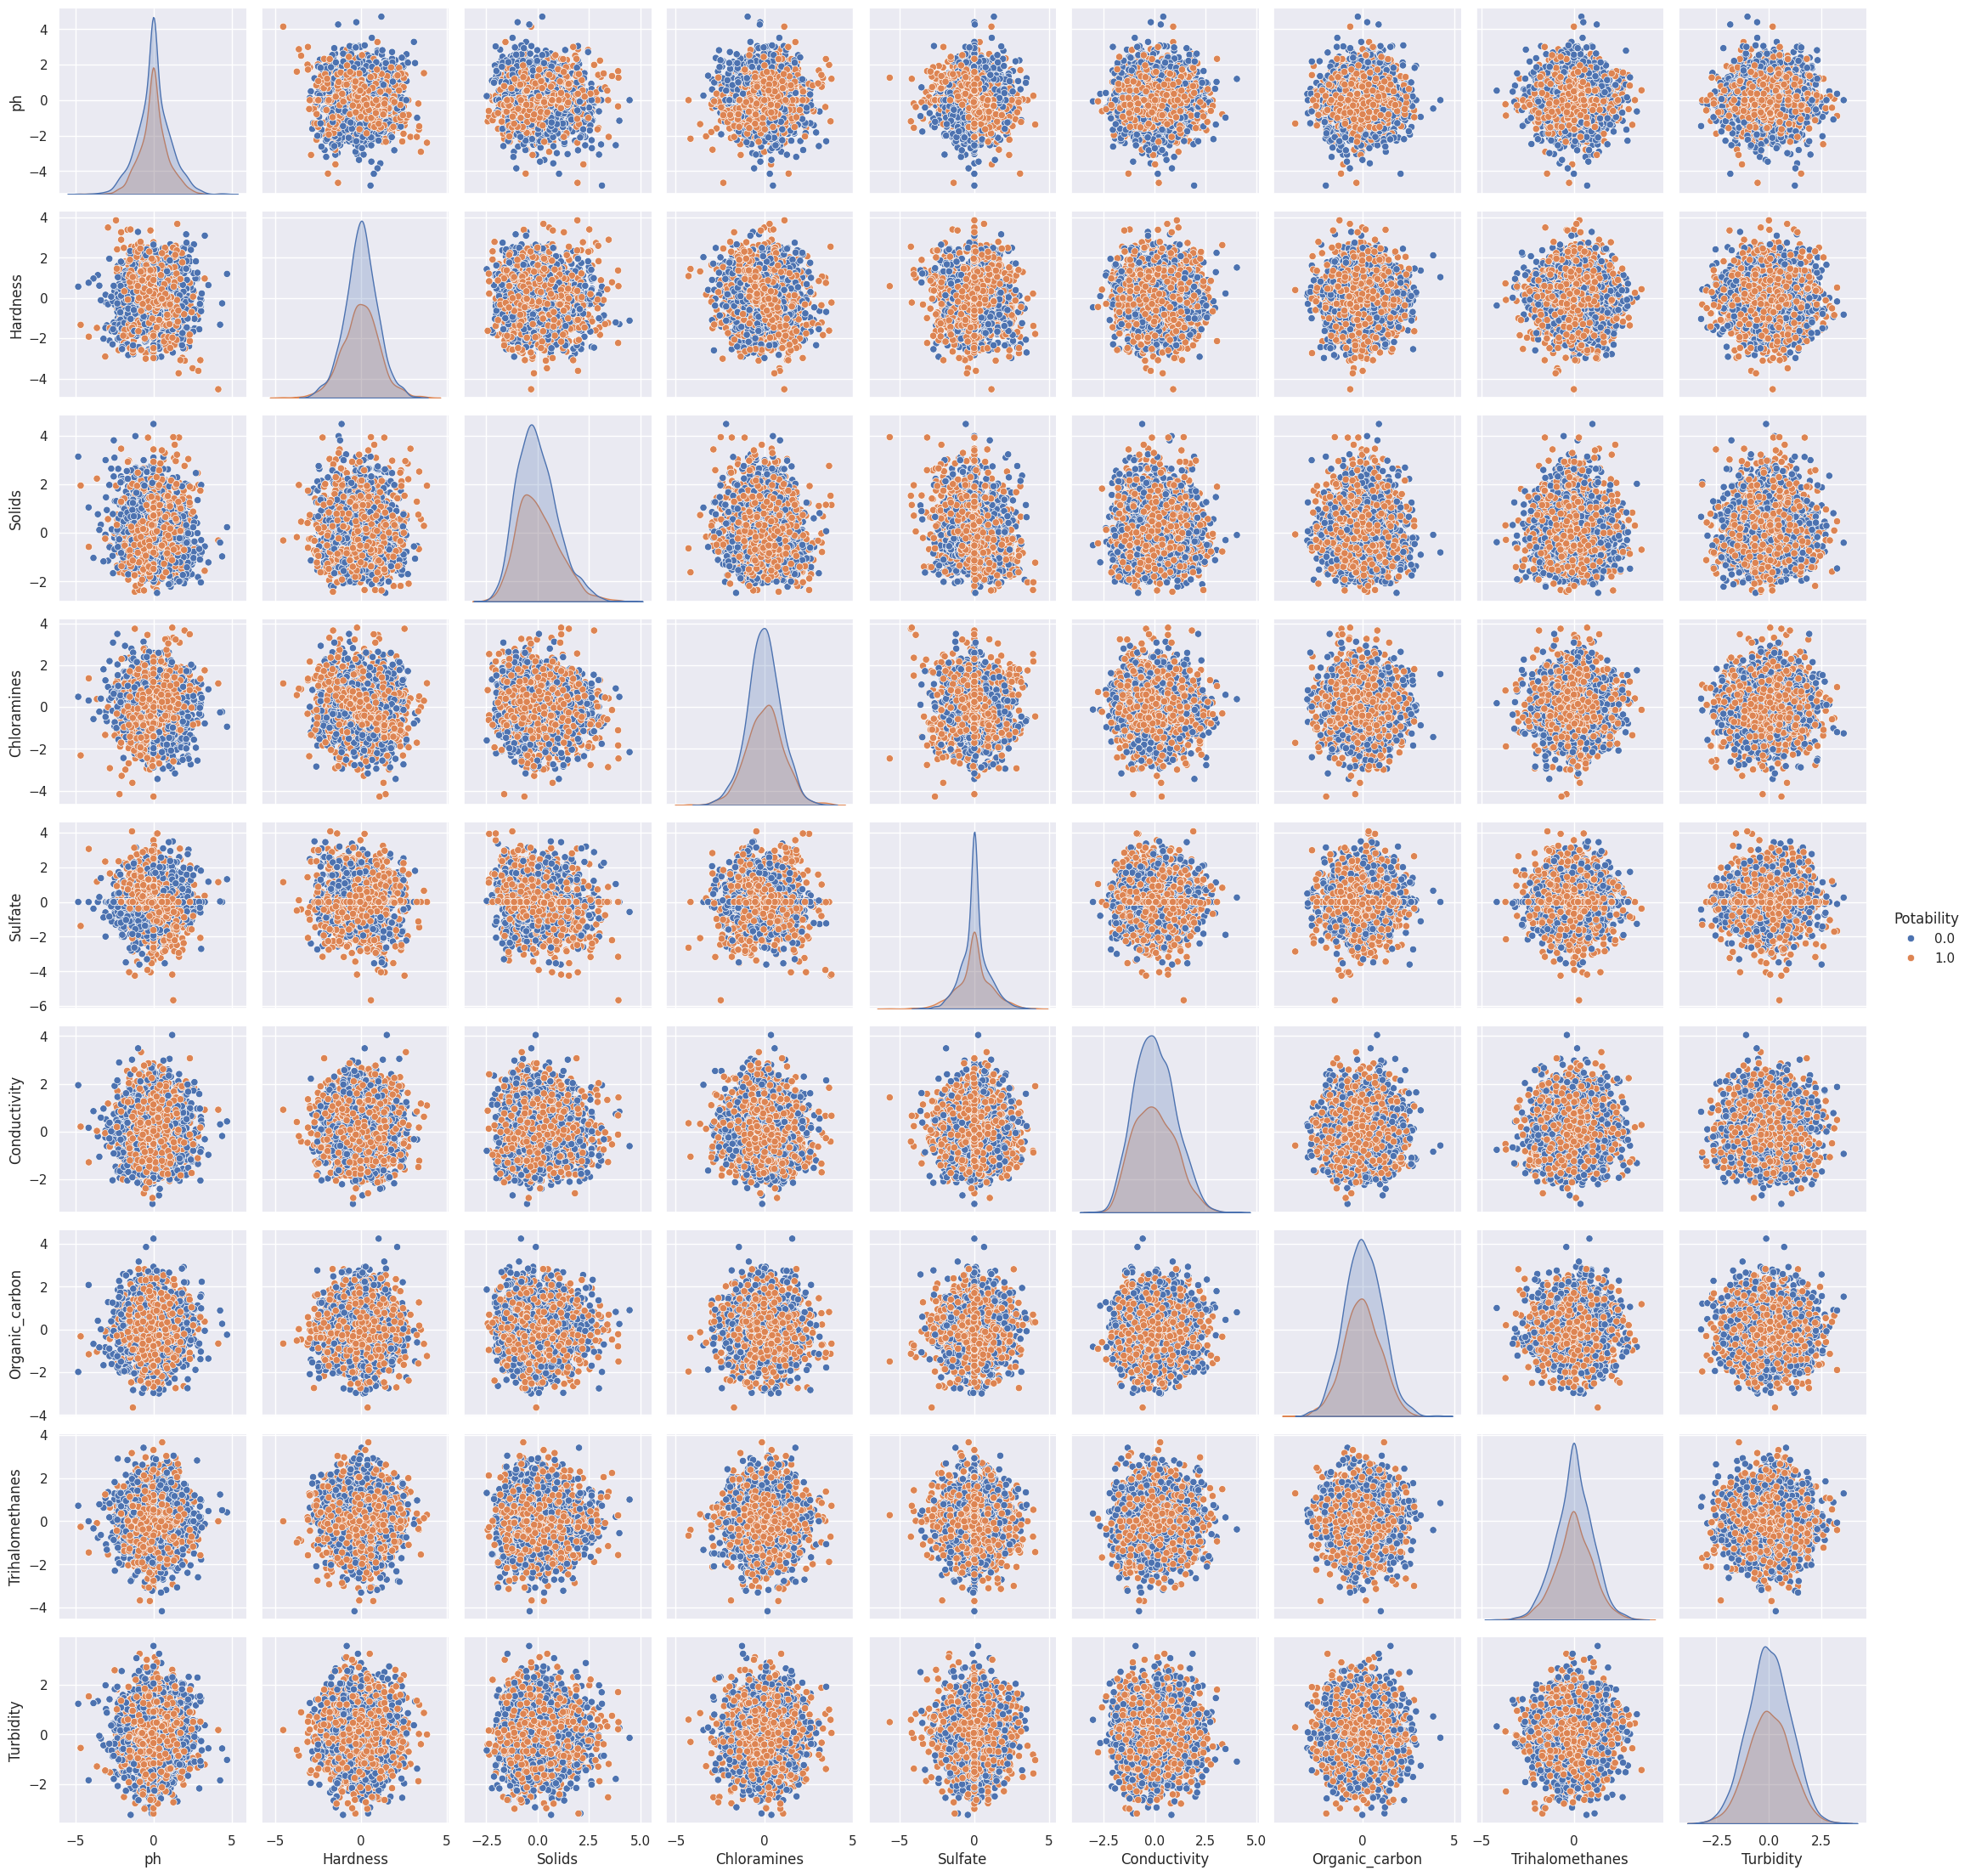

In [22]:
# Plot pairwise comparison to explore the data
_ = sns.pairplot(df, hue='Potability')

plt.show()

It seems like there's no direct correlation in our features. Let's use PCA in order to analyze the features and compare the variability between features

In [23]:
pca = PCA(n_components=x_size)
pca.fit(x)
pca.explained_variance_ratio_, pca.singular_values_

(array([0.13338306, 0.12632158, 0.11732755, 0.11370298, 0.11044415,
        0.10744622, 0.10566013, 0.0985114 , 0.08720294]),
 array([62.71097207, 61.02839884, 58.8156902 , 57.90007586, 57.06430826,
        56.28449442, 55.81472325, 53.89350643, 50.70593025]))

As seen in the pairplot, aproximately all the features contribute with the same weight. So there is no usefulness in taking a subset of the whole set of features.

### <font color="#CA3532">Standard choice</font>

- Evaluate the training with a standard choice of cost and activation functions, learning rate, weight initialization and network topology.
- Generate the loss and accuracy figures

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


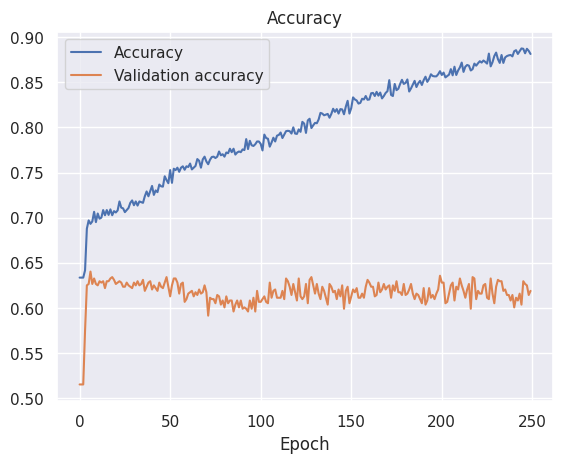

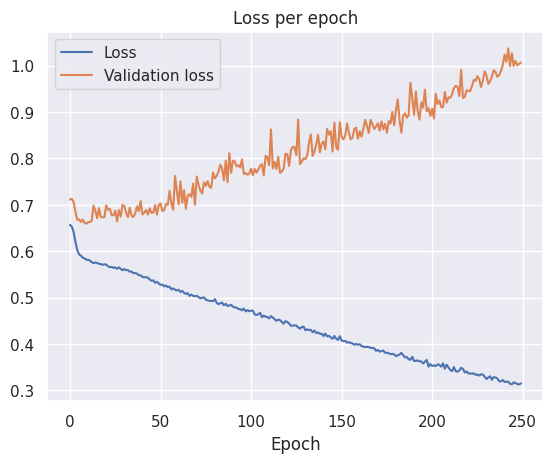

103/103 [==============================] - 0s 856us/step - loss: 0.4411 - accuracy: 0.8370
Accuracy: 83.70


In [24]:
# Code
nn = Sequential()

nn.add(Dense(32, activation='relu', input_shape=(x_size,)))
nn.add(Dense(16, activation='sigmoid'))
nn.add(Dense(8, activation='sigmoid'))
nn.add(Dense(4, activation='sigmoid'))
nn.add(Dense(1, activation='sigmoid'))

# Compile
loss_fn = tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
)

learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.Adamax(learning_rate=learning_RATE), loss=loss_fn, metrics=['accuracy'])

#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

# Fit
history = nn.fit(x, y, epochs=250, verbose=0, validation_split=0.2)

plot_history_and_metrics(nn, history, x, y)

### <font color="#CA3532">Optimizations</font>

- Evaluate each of the following optimization methods using the same representation and the duration of the training in terms of epochs to reach a choice of error and also in terms of time taken.

 a) Regularization

 b) Dropout

 c) Stochastic gradient descent

 d) Momentum  (including Nesterov version)

 e) AdaGrad

 f) RMSProp

 g) Adam

 h) Optimize

##  a) __Regularization__

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


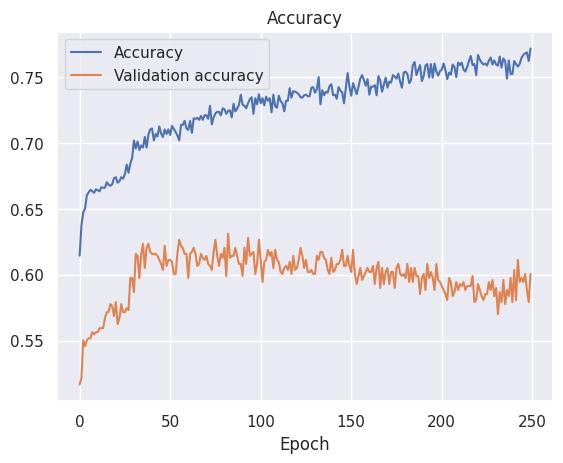

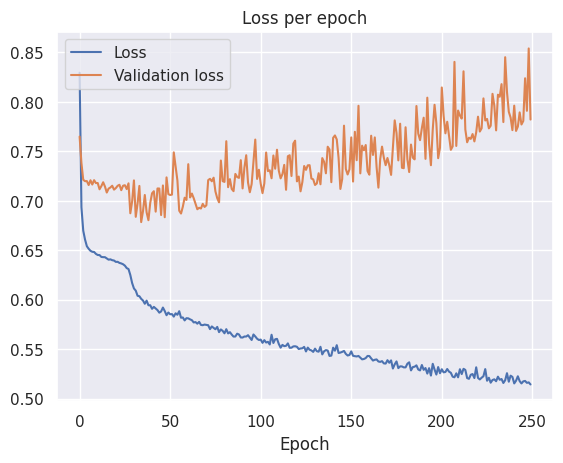

103/103 [==============================] - 0s 859us/step - loss: 0.5576 - accuracy: 0.7384
Accuracy: 73.84


In [25]:
# Code
nn = Sequential()

nn.add(Dense(32, activation='relu', input_shape=(x_size,)))
nn.add(Dense(16, activation='relu', kernel_regularizer=k.regularizers.l2(0.01)))
nn.add(Dense(8, activation='relu', kernel_regularizer=k.regularizers.l2(0.01)))
nn.add(Dense(4, activation='relu', kernel_regularizer=k.regularizers.l2(0.01)))
nn.add(Dense(1, activation='sigmoid'))

# Compile
loss_fn = tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
)

learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.Adamax(learning_rate=learning_RATE), loss=loss_fn, metrics=['accuracy'])

#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

# Fit
history = nn.fit(x, y, epochs=250, verbose=0, validation_split=0.2)

plot_history_and_metrics(nn, history, x, y)

## b) __Dropout__

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


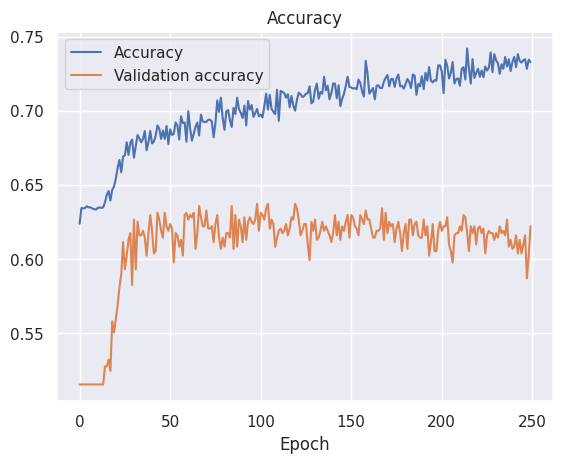

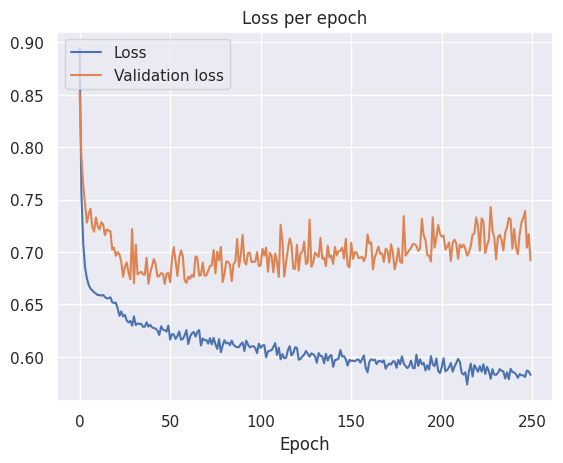

103/103 [==============================] - 0s 850us/step - loss: 0.5845 - accuracy: 0.7311
Accuracy: 73.11


In [26]:
# 

from keras.layers import Dropout

# Code
nn = Sequential()

nn.add(Dense(32, activation='relu', input_shape=(x_size,)))
nn.add(Dense(16, activation='relu', kernel_regularizer=k.regularizers.l2(0.01)))
nn.add(Dropout(0.5))
nn.add(Dense(8, activation='relu', kernel_regularizer=k.regularizers.l2(0.01)))
nn.add(Dropout(0.5))
nn.add(Dense(4, activation='relu', kernel_regularizer=k.regularizers.l2(0.01)))
nn.add(Dense(1, activation='sigmoid'))

# Compile
loss_fn = tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
)

learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.Adamax(learning_rate=learning_RATE), loss=loss_fn, metrics=['accuracy'])

# Fit
history = nn.fit(x, y, epochs=250, verbose=0, validation_split=0.2)

plot_history_and_metrics(nn, history, x, y)

## c) __Stochastic gradient descent__

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


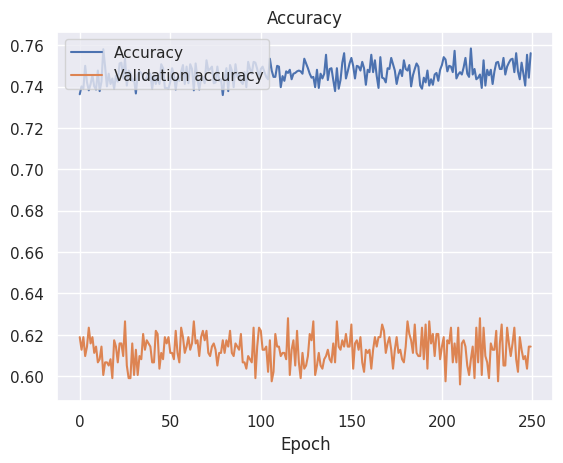

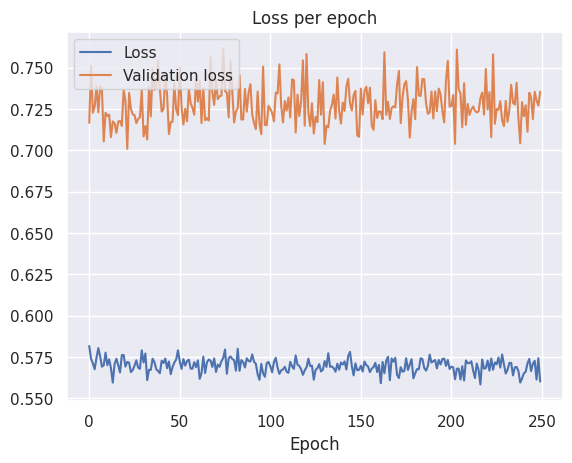

103/103 [==============================] - 0s 858us/step - loss: 0.5760 - accuracy: 0.7445
Accuracy: 74.45


In [27]:
learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.SGD(learning_rate=learning_RATE), loss=loss_fn, metrics=['accuracy'])

# Fit
history = nn.fit(x, y, epochs=250, verbose=0, validation_split=0.2)

plot_history_and_metrics(nn, history, x, y)

## d) __Momentum  (including Nesterov version)__

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


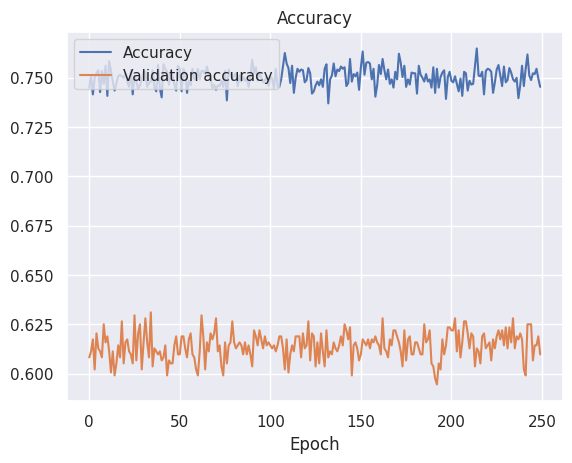

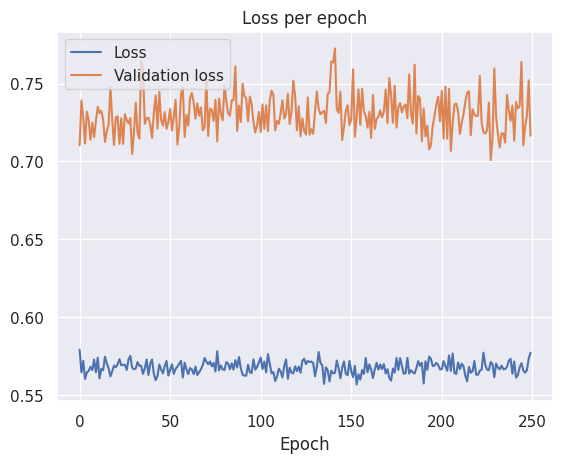

103/103 [==============================] - 0s 846us/step - loss: 0.5749 - accuracy: 0.7491
Accuracy: 74.91


In [28]:
# here it says that with stochastic gradient descent, the nesterov momentum does not improve the convergence rate
# https://machinelearningmastery.com/gradient-descent-with-nesterov-momentum-from-scratch/
learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.SGD(learning_rate=learning_RATE, nesterov=True), loss=loss_fn, metrics=['accuracy'])

# Fit
history = nn.fit(x, y, epochs=250, verbose=0, validation_split=0.2)

plot_history_and_metrics(nn, history, x, y)

## e) __AdaGrad__

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


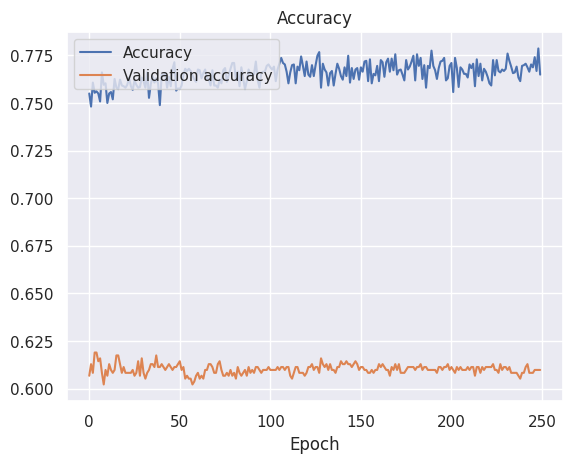

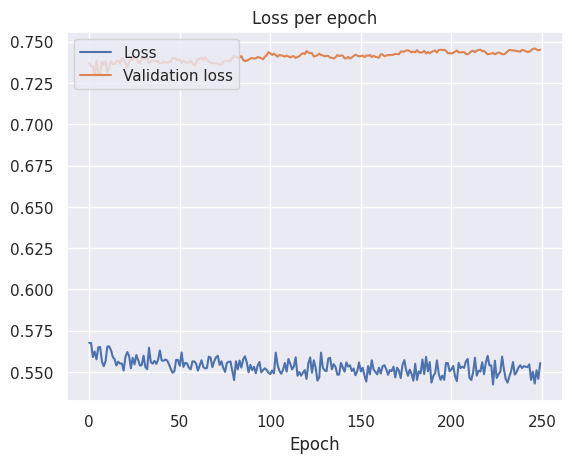

103/103 [==============================] - 0s 872us/step - loss: 0.5684 - accuracy: 0.7558
Accuracy: 75.58


In [29]:
learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.Adagrad(learning_rate=learning_RATE), loss=loss_fn, metrics=['accuracy'])

# Fit
history = nn.fit(x, y, epochs=250, verbose=0, validation_split=0.2)

plot_history_and_metrics(nn, history, x, y)

## f) __RMSProp__

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


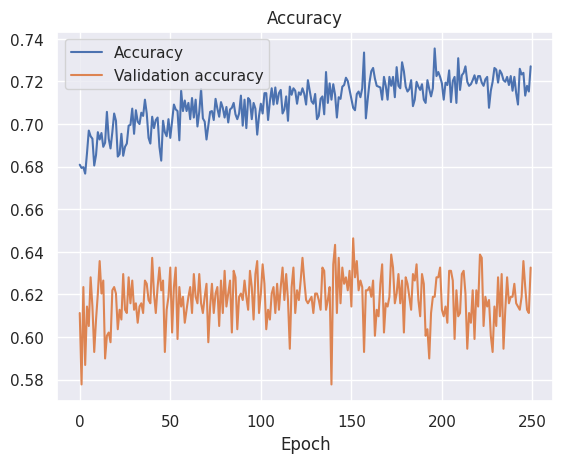

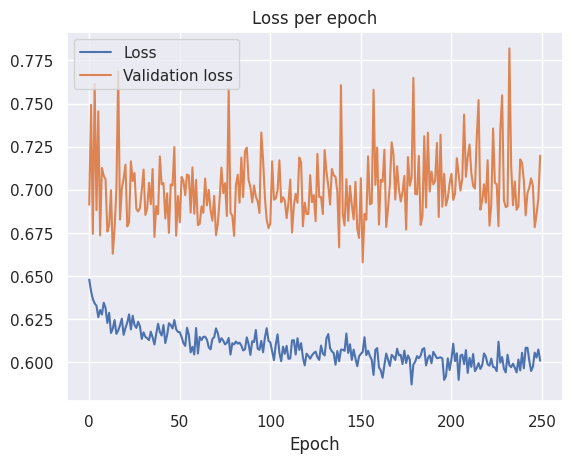

103/103 [==============================] - 0s 873us/step - loss: 0.5945 - accuracy: 0.7234
Accuracy: 72.34


In [30]:
learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.RMSprop(learning_rate=learning_RATE), loss=loss_fn, metrics=['accuracy'])

# Fit
history = nn.fit(x, y, epochs=250, verbose=0, validation_split=0.2)

plot_history_and_metrics(nn, history, x, y)

## g) __Adam__

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


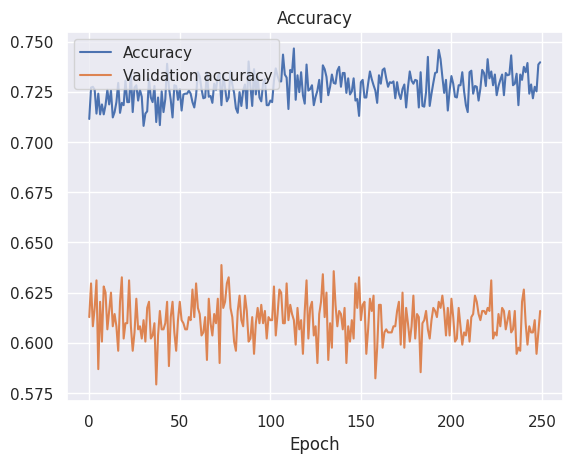

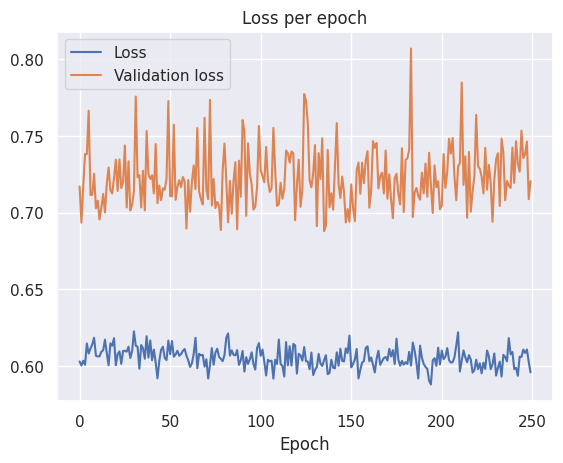

103/103 [==============================] - 0s 846us/step - loss: 0.6135 - accuracy: 0.7164
Accuracy: 71.64


In [31]:
learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.Adam(learning_rate=learning_RATE), loss=loss_fn, metrics=['accuracy'])

# Fit
history = nn.fit(x, y, epochs=250, verbose=0, validation_split=0.2)

plot_history_and_metrics(nn, history, x, y)

## h) __Optimize__

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


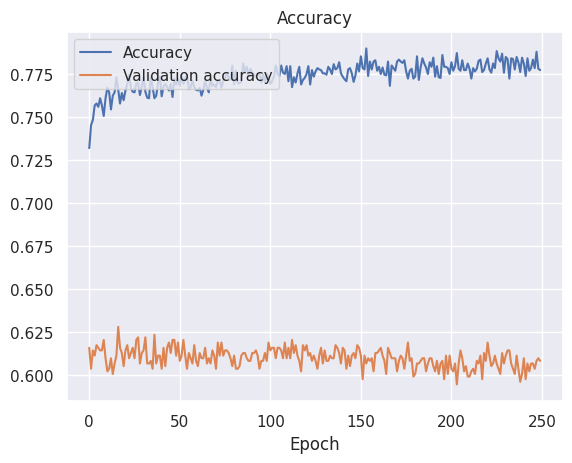

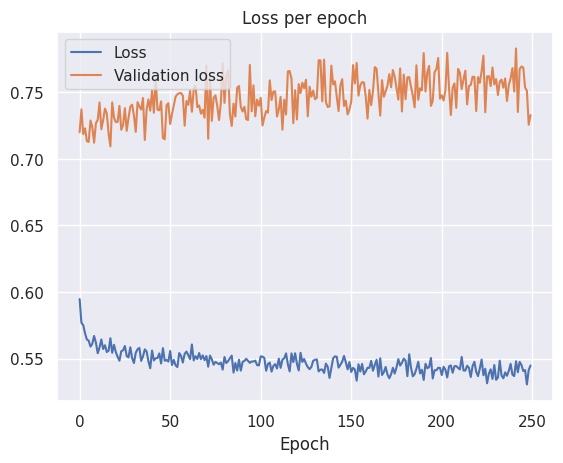

103/103 [==============================] - 0s 864us/step - loss: 0.5585 - accuracy: 0.7692
Accuracy: 76.92


In [32]:
learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.Adamax(learning_rate=learning_RATE), loss=loss_fn, metrics=['accuracy'])

# Fit
history = nn.fit(x, y, epochs=250, verbose=0, validation_split=0.2)

plot_history_and_metrics(nn, history, x, y)

### <font color="#CA3532">Implement parallelization in Keras with the best optimization</font>






*   Run tests for GPU presence

*   Use your best implementation from the previous exercise here and compare the training time both with GPUs and without GPUs.

Comment all your results.





In [33]:
# Testing for GPU Presence
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# best implementation using CPU
import time

with tf.device("/cpu:0"):
    st = time.time()
    history = nn.fit(x, y, epochs=250, verbose=1, validation_split=0.4)
    et = time.time()
    elapsed_time_CPU = et - st
    print("CPU training time (s): {elapsed_time_CPU}")


In [1]:
import tensorflow as tf
import time

with tf.device("/gpu:0"):
    st = time.time()
    history = nn.fit(x, y, epochs=250, verbose=1, validation_split=0.4)
    et = time.time()
    elapsed_time_GPU = et - st
    print("GPU training time (s): {elapsed_time_GPU}")

2023-10-09 15:02:02.104244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 15:02:02.646533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-09 15:02:03.208810: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-09 15:02:03.213428: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

NameError: name 'nn' is not defined